# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
import random
import math as math
import seaborn as sns


from api_keys import api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"



## Generate Cities List

In [2]:
location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

location_data.head()


,lat_values,lng_values
0,49.518531,-43.397312
1,88.427182,-115.835955
2,28.082854,61.136082
3,-32.271030,-26.347630
4,0.331028,-121.241705


In [3]:
location_data['city'] = ""
location_data['country'] = ""

count = 0
for index, row in location_data.iterrows():
    near_city = citipy.nearest_city(row['lat_values'], row['lng_values']).city_name
    near_country = citipy.nearest_city(row['lat_values'], row['lng_values']).country_code
    location_data.set_value(index,"city",near_city)
    location_data.set_value(index,"country",near_country)
location_data.head()

C:\Users\darya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\darya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,lat_values,lng_values,city,country
0,49.518531,-43.397312,torbay,ca
1,88.427182,-115.835955,norman wells,ca
2,28.082854,61.136082,khash,ir
3,-32.271030,-26.347630,sao joao da barra,br
4,0.331028,-121.241705,atuona,pf


In [4]:
len(location_data)

1500

In [5]:
location_data=location_data.drop_duplicates(['city','country'],keep = "first")

In [6]:
location_data['Temp'] = ""
location_data['Humidity'] = ""
location_data['Cloudiness'] = ""
location_data['Wind Speed'] = ""
location_data["Lat"] =""
location_data["Longitude"] =""

In [7]:

sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

location_data.head()

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,49.518531,-43.397312,torbay,ca,,,,,,
1,88.427182,-115.835955,norman wells,ca,,,,,,
2,28.082854,61.136082,khash,ir,,,,,,
3,-32.271030,-26.347630,sao joao da barra,br,,,,,,
4,0.331028,-121.241705,atuona,pf,,,,,,


In [9]:
record = 0
for index, row in location_data.iterrows():
    city_name = row['city']
    country_code = row['country']
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    print (url)
    try: 
        weather_response = req.get(url)
        weather_json = weather_response.json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        location_data.set_value(index,"Temp", temp)
        location_data.set_value(index,"Humidity",humidity)
        location_data.set_value(index,"Wind Speed", wind)
        location_data.set_value(index,"Cloudiness",cloud)
        location_data.set_value(index,"Lat", latitude)
        location_data.set_value(index,"Longitude",longitude)
        print("Retrieved data for %s, %s" % (city_name, country_code))
    except:
        print("No data for %s, %s" % (city_name,country_code))
    record += 1
    if record % 59 == 0:
        time.sleep(60)

http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0


C:\Users\darya\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\darya\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\darya\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\darya\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\darya\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:

Retrieved data for torbay, ca
http://api.openweathermap.org/data/2.5/weather?q=norman wells,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for norman wells, ca
http://api.openweathermap.org/data/2.5/weather?q=khash,ir&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for khash, ir
http://api.openweathermap.org/data/2.5/weather?q=sao joao da barra,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for sao joao da barra, br
http://api.openweathermap.org/data/2.5/weather?q=atuona,pf&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for atuona, pf
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for puerto ayora, ec
http://api.openweathermap.org/data/2.5/weather?q=saint-francois,gp&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for saint-francois, gp
http://api.openweathermap.org/data/2.5/weather?q=kah

Retrieved data for ilulissat, gl
http://api.openweathermap.org/data/2.5/weather?q=iquitos,pe&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for iquitos, pe
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for illoqqortoormiut, gl
http://api.openweathermap.org/data/2.5/weather?q=iqaluit,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for iqaluit, ca
http://api.openweathermap.org/data/2.5/weather?q=barentsburg,sj&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for barentsburg, sj
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for tasiilaq, gl
http://api.openweathermap.org/data/2.5/weather?q=kawardha,in&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for kawardha, in
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&AP

Retrieved data for quatre cocos, mu
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for srednekolymsk, ru
http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for pevek, ru
http://api.openweathermap.org/data/2.5/weather?q=vakhrushev,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for vakhrushev, ru
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for arraial do cabo, br
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for yellowknife, ca
http://api.openweathermap.org/data/2.5/weather?q=boguchany,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for boguchany, ru
http://api.openweathermap.org/data/2.5/weather?q=te 

Retrieved data for ontario, us
http://api.openweathermap.org/data/2.5/weather?q=corrente,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for corrente, br
http://api.openweathermap.org/data/2.5/weather?q=salinas,ec&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for salinas, ec
http://api.openweathermap.org/data/2.5/weather?q=vysokogornyy,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for vysokogornyy, ru
http://api.openweathermap.org/data/2.5/weather?q=amli,no&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for amli, no
http://api.openweathermap.org/data/2.5/weather?q=quthing,ls&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for quthing, ls
http://api.openweathermap.org/data/2.5/weather?q=lolua,tv&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for lolua, tv
http://api.openweathermap.org/data/2.5/weather?q=vardo,no&units=imperial&APPID=ca948e37c7fc34fc07a1ece6f

Retrieved data for bluff, nz
http://api.openweathermap.org/data/2.5/weather?q=halalo,wf&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for halalo, wf
http://api.openweathermap.org/data/2.5/weather?q=luderitz,na&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for luderitz, na
http://api.openweathermap.org/data/2.5/weather?q=angoram,pg&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for angoram, pg
http://api.openweathermap.org/data/2.5/weather?q=carballo,es&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for carballo, es
http://api.openweathermap.org/data/2.5/weather?q=mapastepec,mx&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for mapastepec, mx
http://api.openweathermap.org/data/2.5/weather?q=khani,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for khani, ru
http://api.openweathermap.org/data/2.5/weather?q=svrljig,rs&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31

Retrieved data for kamenka, ru
http://api.openweathermap.org/data/2.5/weather?q=faya,td&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for faya, td
http://api.openweathermap.org/data/2.5/weather?q=anadyr,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for anadyr, ru
http://api.openweathermap.org/data/2.5/weather?q=koppies,za&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for koppies, za
http://api.openweathermap.org/data/2.5/weather?q=uthai thani,th&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for uthai thani, th
http://api.openweathermap.org/data/2.5/weather?q=kalmar,se&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for kalmar, se
http://api.openweathermap.org/data/2.5/weather?q=el alto,pe&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for el alto, pe
http://api.openweathermap.org/data/2.5/weather?q=selma,us&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Ret

Retrieved data for reconquista, ar
http://api.openweathermap.org/data/2.5/weather?q=ende,id&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for ende, id
http://api.openweathermap.org/data/2.5/weather?q=bur gabo,so&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
No data for bur gabo, so
http://api.openweathermap.org/data/2.5/weather?q=oranjemund,na&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for oranjemund, na
http://api.openweathermap.org/data/2.5/weather?q=arkhara,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for arkhara, ru
http://api.openweathermap.org/data/2.5/weather?q=sao gabriel da cachoeira,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for sao gabriel da cachoeira, br
http://api.openweathermap.org/data/2.5/weather?q=mora,cm&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for mora, cm
http://api.openweathermap.org/data/2.5/weather?q=ankpa,ng&units=imperial

Retrieved data for teguise, es
http://api.openweathermap.org/data/2.5/weather?q=zonguldak,tr&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for zonguldak, tr
http://api.openweathermap.org/data/2.5/weather?q=basar,in&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for basar, in
http://api.openweathermap.org/data/2.5/weather?q=port moresby,pg&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for port moresby, pg
http://api.openweathermap.org/data/2.5/weather?q=half moon bay,us&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for half moon bay, us
http://api.openweathermap.org/data/2.5/weather?q=florianopolis,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for florianopolis, br
http://api.openweathermap.org/data/2.5/weather?q=colares,pt&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for colares, pt
http://api.openweathermap.org/data/2.5/weather?q=puerto narino,co

Retrieved data for lavrentiya, ru
http://api.openweathermap.org/data/2.5/weather?q=dasoguz,tm&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for dasoguz, tm
http://api.openweathermap.org/data/2.5/weather?q=manitouwadge,ca&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for manitouwadge, ca
http://api.openweathermap.org/data/2.5/weather?q=victor harbor,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for victor harbor, au
http://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for cayenne, gf
http://api.openweathermap.org/data/2.5/weather?q=mezen,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for mezen, ru
http://api.openweathermap.org/data/2.5/weather?q=twentynine palms,us&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for twentynine palms, us
http://api.openweathermap.org/data/2.5/weather?q=velika gori

Retrieved data for billings, us
http://api.openweathermap.org/data/2.5/weather?q=bom jesus,br&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for bom jesus, br
http://api.openweathermap.org/data/2.5/weather?q=lumphat,kh&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for lumphat, kh
http://api.openweathermap.org/data/2.5/weather?q=labuan,my&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for labuan, my
http://api.openweathermap.org/data/2.5/weather?q=korla,cn&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for korla, cn
http://api.openweathermap.org/data/2.5/weather?q=aswan,eg&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for aswan, eg
http://api.openweathermap.org/data/2.5/weather?q=cap malheureux,mu&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for cap malheureux, mu
http://api.openweathermap.org/data/2.5/weather?q=tongsa,bt&units=imperial&APPID=ca948e37c7

Retrieved data for matay, eg
http://api.openweathermap.org/data/2.5/weather?q=arlit,ne&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for arlit, ne
http://api.openweathermap.org/data/2.5/weather?q=inyonga,tz&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for inyonga, tz
http://api.openweathermap.org/data/2.5/weather?q=kimparana,ml&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for kimparana, ml
http://api.openweathermap.org/data/2.5/weather?q=rio gallegos,ar&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for rio gallegos, ar
http://api.openweathermap.org/data/2.5/weather?q=broken hill,au&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for broken hill, au
http://api.openweathermap.org/data/2.5/weather?q=gazimurskiy zavod,ru&units=imperial&APPID=ca948e37c7fc34fc07a1ece6ffdb31a0
Retrieved data for gazimurskiy zavod, ru
http://api.openweathermap.org/data/2.5/weather?q=viransehir,tr&

In [10]:
location_data.head(20)

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,49.518531,-43.397312,torbay,ca,49.14,93,90,3.56,47.66,-52.73
1,88.427182,-115.835955,norman wells,ca,77,33,75,3.36,65.28,-126.83
2,28.082854,61.136082,khash,ir,72.08,8,0,6.22,28.22,61.21
3,-32.271030,-26.347630,sao joao da barra,br,67.22,92,0,1.92,-21.64,-41.05
4,0.331028,-121.241705,atuona,pf,80.9,79,0,19.1,-9.8,-139.03
5,0.265366,-108.992504,puerto ayora,ec,72.26,81,30,9.17,-0.74,-90.35
6,17.528415,-57.719577,saint-francois,gp,80.6,83,20,5.82,16.25,-61.27
7,29.311245,-149.320801,kahului,us,80.74,48,40,9.17,20.89,-156.47
8,63.708382,18.715206,ornskoldsvik,se,51.98,76,46,5.82,63.29,18.72
9,35.946878,-72.828353,virginia beach,us,78.24,74,1,13.87,36.85,-75.98


In [11]:
len(location_data)

608

In [12]:
location_data.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [13]:
location_data['Lat'] = pd.to_numeric(location_data['Lat'], errors = 'coerce')
location_data['Temp'] = pd.to_numeric(location_data['Temp'], errors = 'coerce')
location_data['Humidity'] = pd.to_numeric(location_data['Humidity'], errors = 'coerce')
location_data['Wind Speed'] = pd.to_numeric(location_data['Wind Speed'], errors = 'coerce')
location_data['Cloudiness'] = pd.to_numeric(location_data['Cloudiness'], errors = 'coerce')

In [14]:
location_data.head()

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,49.518531,-43.397312,torbay,ca,49.14,93.0,90.0,3.56,47.66,-52.73
1,88.427182,-115.835955,norman wells,ca,77.00,33.0,75.0,3.36,65.28,-126.83
2,28.082854,61.136082,khash,ir,72.08,8.0,0.0,6.22,28.22,61.21
3,-32.271030,-26.347630,sao joao da barra,br,67.22,92.0,0.0,1.92,-21.64,-41.05
4,0.331028,-121.241705,atuona,pf,80.90,79.0,0.0,19.10,-9.80,-139.03


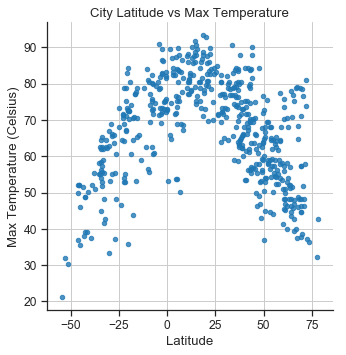

In [15]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Temp',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("City Latitude vs Max Temperature")
plt.show()

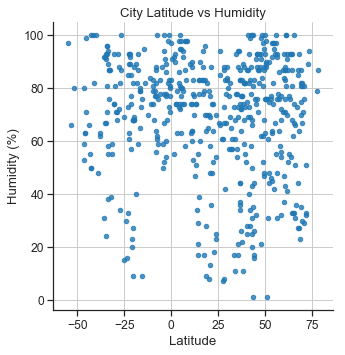

In [16]:

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Humidity',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.show()

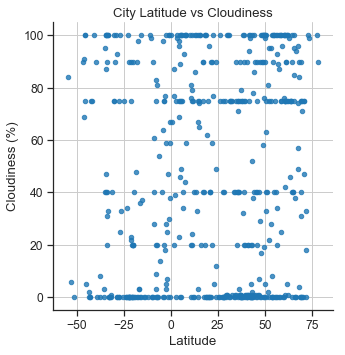

In [17]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Cloudiness',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.show()

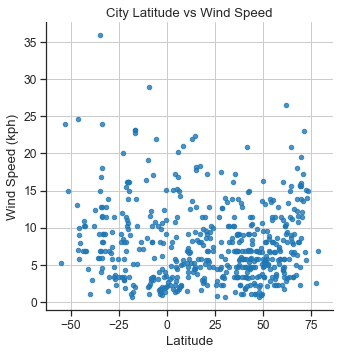

In [18]:

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Lat',
          'Wind Speed',
          data=location_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("City Latitude vs Wind Speed")
plt.show()